In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')


In [34]:
RF_RMSE_list=[2.0945,1.9940,2.4511,1.4267,1.6726,1.836,1.9001,1.67118,2.763,1.995]
LGBM_RMSE_list=[2.0051,1.633,2.535,1.259,1.718,2.056,1.6934,1.39003,2.1231,1.827]

In [35]:
print (np.mean(RF_RMSE_list))

1.9804179999999998


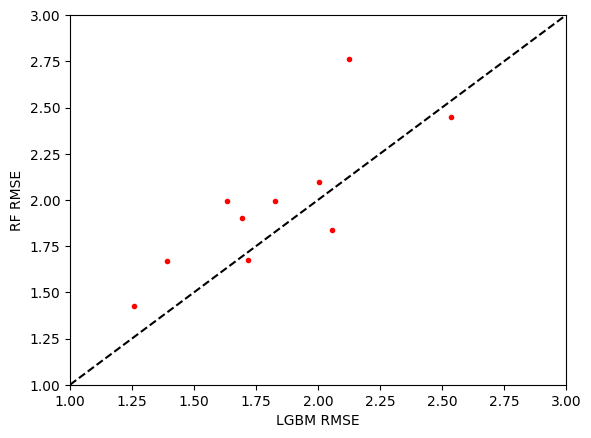

In [16]:
plt.plot(LGBM_RMSE_list,RF_RMSE_list,'r.')
plt.xlabel('LGBM RMSE')
plt.ylabel('RF RMSE')
x=np.linspace(1,3,10)
y=x
plt.plot(x,y,'k--')
plt.xlim(1,3)
plt.ylim(1,3)
plt.savefig('LGBM_RF.png')

In [17]:
cal=pd.read_csv('./data/calendar.csv')
sales_train_evaluation=pd.read_csv('data/sales_train_evaluation.csv')
sell_prices=pd.read_csv('data/sell_prices.csv')

In [18]:
submission_RF=pd.read_csv('submission_RF.csv')

In [19]:
submission_RF

,Unnamed: 0,id,F1,F2,F3,F4,F5,F6,F7,F8,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,0,HOBBIES_1_001_CA_1_validation,0.571924,0.549656,0.521393,0.542062,0.564117,0.691457,0.591534,0.758412,...,0.598663,0.839422,1.085910,0.726496,0.504568,0.414098,0.517167,0.863892,1.149635,0.526622
1,1,HOBBIES_1_002_CA_1_validation,0.229713,0.330171,0.471471,0.313153,0.165081,0.173899,0.169358,0.363782,...,0.166103,0.174652,0.379656,0.508283,0.459796,0.471493,0.313735,0.342380,0.436883,0.430779
2,2,HOBBIES_1_003_CA_1_validation,0.511612,0.468794,0.384811,0.498880,0.608885,0.477564,0.562402,0.486461,...,0.520387,0.692975,0.555375,0.420763,0.439602,0.371300,0.362698,0.622443,0.703946,0.655617
3,3,HOBBIES_1_004_CA_1_validation,2.351183,1.394482,1.254957,1.695332,2.344336,3.073502,2.933100,2.190875,...,2.169585,2.483761,3.091729,1.773396,1.877424,1.606104,1.648758,2.001424,1.994557,2.804731
4,4,HOBBIES_1_005_CA_1_validation,1.200096,1.074119,1.062718,1.188878,1.413420,1.612824,1.332291,1.049909,...,1.397514,1.345792,1.419636,1.042275,1.277361,1.246123,1.031862,0.866480,1.288447,1.470940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,60975,FOODS_3_823_WI_3_evaluation,0.711500,0.636969,0.539096,0.207778,0.599158,0.576468,0.705221,0.354855,...,0.303601,0.213109,0.318531,0.211318,0.312429,0.208827,0.292654,0.300571,0.211934,0.219031
60976,60976,FOODS_3_824_WI_3_evaluation,0.437582,0.177524,0.339153,0.379133,0.376582,0.379061,0.186614,0.184199,...,0.173531,0.183448,0.189380,0.184935,0.180588,0.181214,0.179956,0.173473,0.249875,0.186576
60977,60977,FOODS_3_825_WI_3_evaluation,1.079878,0.971098,0.671982,0.592972,0.652619,0.806355,0.702220,0.700838,...,0.377387,0.381798,0.253744,0.241634,0.357436,0.367910,0.235353,0.354753,0.253393,0.373213
60978,60978,FOODS_3_826_WI_3_evaluation,1.186952,0.741194,0.583080,0.647965,0.586323,0.624746,0.649964,0.505066,...,0.284935,0.285125,0.294848,0.279059,0.287207,0.296455,0.342516,0.196344,0.282739,0.293054


In [20]:
catalog_all=pd.melt(submission_RF,id_vars=['id'],var_name='F',value_name='sold')

,id,F,sold
0,HOBBIES_1_001_CA_1_validation,Unnamed: 0,0.000000
1,HOBBIES_1_002_CA_1_validation,Unnamed: 0,1.000000
2,HOBBIES_1_003_CA_1_validation,Unnamed: 0,2.000000
3,HOBBIES_1_004_CA_1_validation,Unnamed: 0,3.000000
4,HOBBIES_1_005_CA_1_validation,Unnamed: 0,4.000000
...,...,...,...
1768415,FOODS_3_823_WI_3_evaluation,F28,0.219031
1768416,FOODS_3_824_WI_3_evaluation,F28,0.186576
1768417,FOODS_3_825_WI_3_evaluation,F28,0.373213
1768418,FOODS_3_826_WI_3_evaluation,F28,0.293054


In [9]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [3]:
loaded_model = joblib.load('model_store_RF_0.pkl')

In [10]:
data=pd.read_pickle('data.pkl')
valid=data[(data['d']>=1914)&(data['d']<1942)][['id','d','sold']]
test=data[data['d']>=1942][['id','d','sold']]

In [5]:
df= data[data['store_id']==0]
X_train,y_train=df[df['d']<1914].drop('sold',axis=1),df[df['d']<1914]['sold']
X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']

In [12]:
result = loaded_model.predict(X_valid)

residaul_std=np.std(result- y_valid)
residaul_mean=np.mean(result- y_valid)


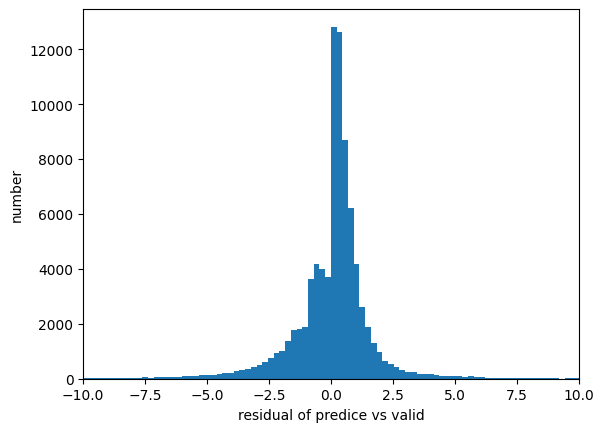

In [13]:
plt.hist(result- y_valid,bins=500)
plt.xlim(-10,10)
plt.xlabel('residual of predice vs valid')
plt.ylabel('number')
plt.savefig('Residaul_hist_RF.png')

In [14]:
print (residaul_std,residaul_mean)

2.0445384545515526 -0.02816871205513184


In [15]:
loaded_model = joblib.load('model_store_LGBM_0.pkl')

In [16]:
result = loaded_model.predict(X_valid)

residaul_std=np.std(result- y_valid)
residaul_mean=np.mean(result- y_valid)

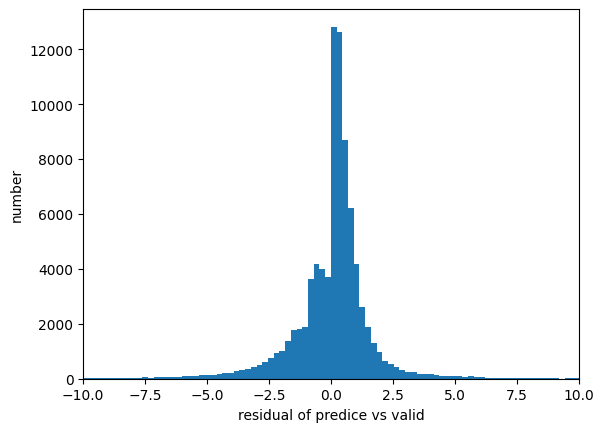

In [17]:
plt.hist(result- y_valid,bins=500)
plt.xlim(-10,10)
plt.xlabel('residual of predice vs valid')
plt.ylabel('number')
plt.savefig('Residaul_hist_LGBM.png')

In [18]:
print (residaul_std,residaul_mean)

2.0445384545515526 -0.02816871205513184


In [19]:
loaded_model = joblib.load('model_store_XGB_0.pkl')

In [21]:
result = loaded_model.predict(X_valid)

residaul_std=np.std(result- y_valid)
residaul_mean=np.mean(result- y_valid)

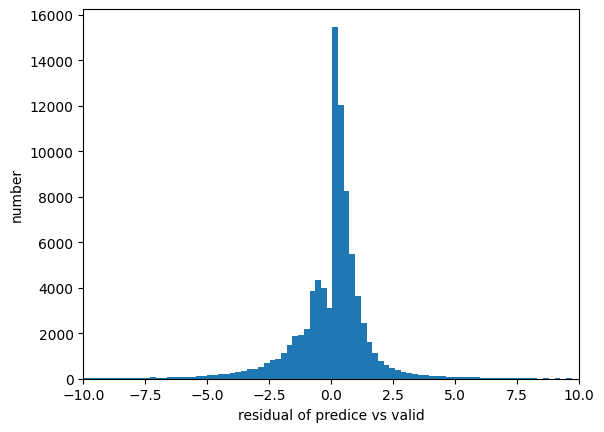

In [22]:
plt.hist(result- y_valid,bins=500)
plt.xlim(-10,10)
plt.xlabel('residual of predice vs valid')
plt.ylabel('number')
plt.savefig('Residaul_hist_LGBM.png')

In [23]:
print (residaul_std,residaul_mean)

2.0546267 -0.0668827


In [17]:
residaul_sum_list=[]
for i in range(10):
    df= data[data['store_id']==i]
    X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']
    modlename=f'model_store_XGB_{i}.pkl'
    loaded_model = joblib.load(modlename)
    result = loaded_model.predict(X_valid)
    residaul_sum=(result- y_valid)**2
    #print (residaul_std,residaul_mean)
    residaul_sum_list.append(residaul_sum)

rmse=(np.sum(residaul_sum_list)/(28*30490))**0.5
print (rmse)

1.971815134420862


In [18]:
residaul_sum_list=[]
for i in range(10):
    df= data[data['store_id']==i]
    X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']
    modlename=f'model_store_RF_{i}.pkl'
    loaded_model = joblib.load(modlename)
    result = loaded_model.predict(X_valid)
    residaul_sum=(result- y_valid)**2
    #print (residaul_std,residaul_mean)
    residaul_sum_list.append(residaul_sum)

rmse=(np.sum(residaul_sum_list)/(28*30490))**0.5
print (rmse)

2.014855370165439


In [20]:
residaul_sum_list=[]
for i in range(10):
    df= data[data['store_id']==i]
    X_valid,y_valid=df[(df['d']>=1914)&(df['d']<1942)].drop('sold',axis=1),df[(df['d']>=1914)&(df['d']<1942)]['sold']
    modlename=f'model_store_LGBM_{i}.pkl'
    loaded_model = joblib.load(modlename)
    result = loaded_model.predict(X_valid)
    residaul_sum=(result- y_valid)**2
    #print (residaul_std,residaul_mean)
    residaul_sum_list.append(residaul_sum)

rmse=(np.sum(residaul_sum_list)/(28*30490))**0.5
print (rmse)

1.9668697138790838
